In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

tf.__version__

'2.2.0'

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
print("Training set: ", X_train.shape,"\nTesting Set: ", X_test.shape)

X_train_og, X_test_og = X_train, X_test
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Declaring input shape
model_input_shape = X_train[0].shape

# Declaring Labels
class_names  = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Training set:  (50000, 32, 32, 3) 
Testing Set:  (10000, 32, 32, 3)


In [3]:
new_model = tf.keras.models.load_model('saved_model/my_CNN_model')

In [4]:
new_model.evaluate(X_test, Y_test)
predictions = new_model.predict(X_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.8633 - accuracy: 0.7042


Predicted:  cat 
Actual:  cat


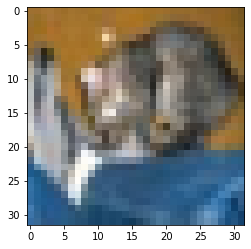

In [5]:
print("Predicted: ",
      class_names[np.argmax(new_model.predict(np.expand_dims(X_test[0],0)))],
      "\nActual: ",
      class_names[Y_test[0][0]])
plt.imshow(X_test_og[0])

In [6]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10)) # , [class_names[a] for a in range(10)]  --> for labels under image
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

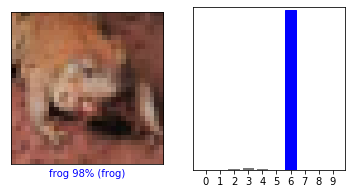

In [7]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test_og)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_test)
plt.show()

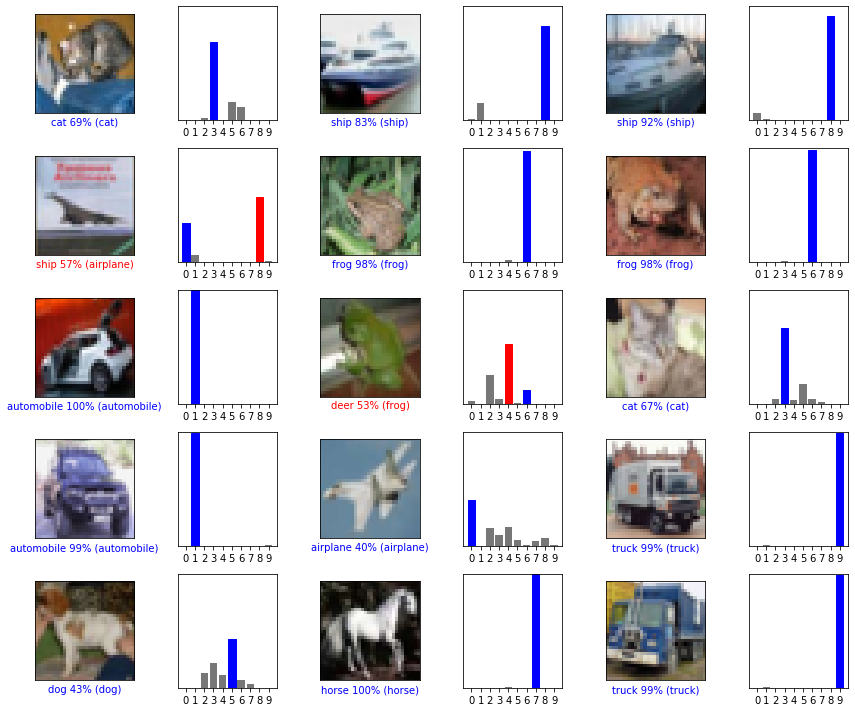

In [8]:

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_test, X_test_og)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

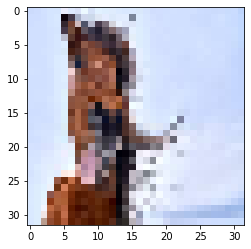

In [9]:
from keras.preprocessing import image
import os


test_image = image.load_img('images/horse.jpg', target_size = (32, 32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model.predict(test_image)

In [10]:
result

array([[0.04457465, 0.01413511, 0.15753259, 0.24389705, 0.16917348,
        0.13547751, 0.05664033, 0.10439234, 0.03284347, 0.04133347]],
      dtype=float32)

In [11]:
def plot_image1(predictions_array, img, pic):
    
    predictions_array,  img , pic= predictions_array,  img, pic
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label], 100*np.max(predictions_array), pic))

def plot_value_array1(predictions_array):
    predictions_array = predictions_array
    plt.grid(False)
    plt.xticks(range(10)) # , [class_names[a] for a in range(10)]  --> for labels under image
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


In [12]:
directory = os.fsencode(r"C:\Users\Matheus\Desktop\ml\CNN_cifar10\images")
ls = []   
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg") : 
        ls.append(filename)


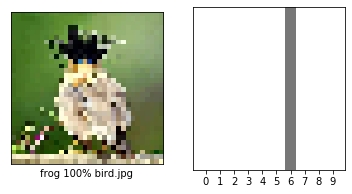

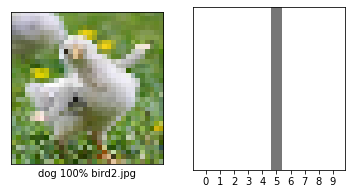

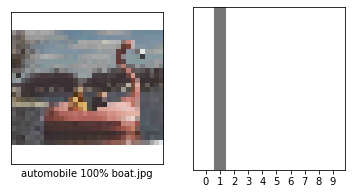

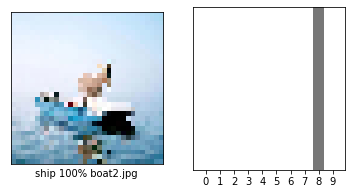

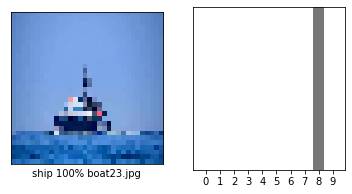

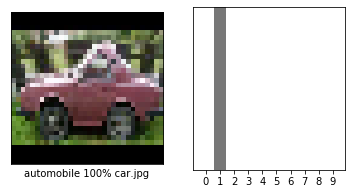

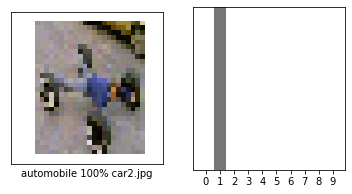

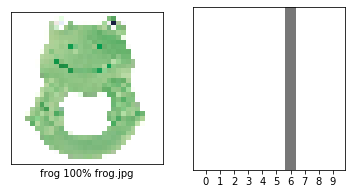

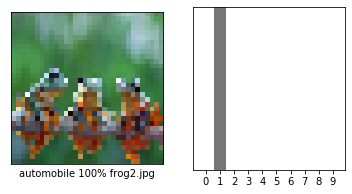

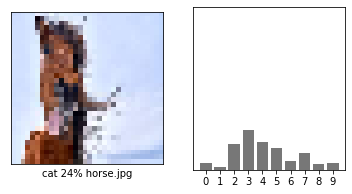

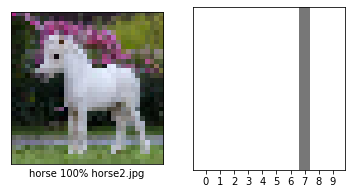

In [13]:
for pic in ls:
    test_image = image.load_img(('images/'+pic), target_size = (32, 32))
    pro_image = image.img_to_array(test_image)
    pro_image = np.expand_dims(pro_image, axis = 0)
    result = new_model.predict(pro_image)
    
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image1(result[0], test_image, pic)
    plt.subplot(1,2,2)
    plot_value_array1(result[0])
    plt.show()
    